# <b><u>Konkrete Fragen</u></b>

Das Trinkgeldverhalten ist ein Schlüsselindikator für die Zufriedenheit der Kunden und Zusteller. Neben den generellen Einflussfaktoren wie Tageszeit oder Bestellhistorie könnten auch die bestellten Produkte selbst eine wichtige Rolle spielen. So könnte etwa die Wahl bestimmter Kategorien oder spezifischer Produkte einen Einfluss auf die Bereitschaft der Kunden haben, ein Trinkgeld zu geben. Ein besseres Verständnis dieser Zusammenhänge bietet nicht nur die Möglichkeit, das Kundenerlebnis gezielt zu verbessern, sondern könnte auch dabei helfen, gezielte Marketing- und Dispositionsstrategien zu entwickeln.

In unserer Analyse untersuchen wir daher, ob das Trinkgeldverhalten mit den bestellten Produktkategorien (Departments) zusammenhängt, welche Produkte die Wahrscheinlichkeit eines Trinkgeldes besonders beeinflussen und ob diese Effekte unabhängig von den Departments bestehen. Diese Erkenntnisse bilden eine solide Grundlage für datengetriebene Entscheidungen in den operativen und strategischen Geschäftsbereichen.

## <b>Inhaltsverzeichnis</b>

<ul>
  <li><a href="#datenvorbereitung" style="color:white;">1. Datenvorbereitung</a>
    <ul>
      <li><a href="#bibliotheken" style="color:white;">Bibliotheken</a></li>
      <li><a href="#daten-einlesen" style="color:white;">Daten einlesen</a></li>
      <li><a href="#tabellen-zusammenführen" style="color:white;">Tabellen zusammenführen</a></li>
    </ul>
  </li>
  <li><a href="#konkrete-fragen-der-stakeholder" style="color:white;">2. Konkrete Fragen der Stakeholder</a>
    <ul>
      <li><a href="#abhängigkeit-des-trinkgeldverhaltens-zu-früheren-bestellungen" style="color:white;">Abhängigkeit des Trinkgeldverhaltens zu früheren Bestellungen</a>
        <ul>
          <li><a href="#zusammenhang-zur-vorhergehenden-bestellung" style="color:white;">Zusammenhang zur vorhergehenden Bestellung</a></li>
          <li><a href="#zusammenhang-zur-vor-vorhergehenden-bestellung" style="color:white;">Zusammenhang zur vor-vorhergehenden Bestellung</a></li>
          <li><a href="#direkter-zusammenhang-zur-vor-vorhergehenden-bestellung-über-vorhergehende-bestellung-hinaus" style="color:white;">Direkter Zusammenhang zur vor-vorhergehenden Bestellung über vorhergehende Bestellung hinaus</a></li>
        </ul>
      </li>
      <li><a href="#abhängigkeit-des-trinkgeldverhaltens-zu-den-produkten-und-departments" style="color:white;">Abhängigkeit des Trinkgeldverhaltens zu den Produkten und Departments</a>
        <ul>
          <li><a href="#zusammenhang-zu-departments" style="color:white;">Zusammenhang zu Departments</a></li>
          <li><a href="#produkte-mit-starkem-einfluss-auf-das-trinkgeldverhalten" style="color:white;">Produkte mit starkem Einfluss auf das Trinkgeldverhalten</a></li>
          <li><a href="#direkter-zusammenhang-zu-produkten-über-entsprechende-departments-hinaus" style="color:white;">Direkter Zusammenhang zu Produkten über entsprechende Departments hinaus</a></li>
        </ul>
      </li>
      <li><a href="#abhängigkeit-des-trinkgeldverhaltens-zur-tageszeit-wochentag-und-zeitabstand-zu-vorheriger-bestellung" style="color:white;">Abhängigkeit des Trinkgeldverhaltens zur Tageszeit Wochentag und Zeitabstand zu vorheriger Bestellung</a></li>
              <ul>
          <li><a href="#zusammenhang-zur-tageszeit" style="color:white;">Zusammenhang zur Tageszeit</a></li>
          <li><a href="#zusammenhang-zum-wochentag" style="color:white;">Zusammenhang zum Wochentag</a></li>
          <li><a href="#zusammenhang-zum-zeitabstand-zur-vorherigen-bestellung" style="color:white;">Zusammenhang zum Zeitabstand zur vorherigen Bestellung</a></li>
        </ul>
    </ul>
  </li>
  <li><a href="#zusammenfassung" style="color:white;">3. Zusammenfassung</a>
  </li>
</ul>


## **Datenvorbereitung**

### Bibliotheken

In [56]:
# importieren der benötigten Bibliotheken
import pandas as pd # Datenverarbeitung
import numpy as np 
import plotly.express as px # Visualisierung
from scipy.stats import chi2_contingency, chi2 # Chi-Quadrat-Test
import os # Dateipfade

### Daten einlesen

In [57]:
# Pfade zu den Dateien
os.chdir("Datensätze")

df_aisles = pd.read_csv("aisles.csv.zip",)
df_departments = pd.read_csv("departments.csv.zip")
df_order_products = pd.read_csv("order_products_s.csv.zip")
df_oders_s = pd.read_csv("orders_s.csv.zip")
df_products = pd.read_csv("products.csv.zip")
df_tips = pd.read_csv("tips.csv.zip")

os.chdir("..")

### Tabellen zusammenführen

In [58]:
# Für Frage 2
# Merge 1: Tips + Order_Products (über order_id)
df_merged = df_tips.merge(df_order_products, on="order_id")

# Merge 2: Merge1 + Products (über product_id)
df_merged = df_merged.merge(df_products, on="product_id")

# Merge 3: Merge mit Departments (über department_id)
df_merged = df_merged.merge(df_departments, on="department_id")

## **Konkrete Fragen der Stakeholder**

### **Abhängigkeit des Trinkgeldverhaltens zu früheren Bestellungen**


<u>Leitfrage:</u> Hängt die Wahrscheinlichkeit, dass bei einer Bestellung Trinkgeld gegeben wird, vom Trinkgeldverhalten bei früheren Bestellungen desselben Bestellers ab?

#### **Zusammenhang zur vorhergehenden Bestellung**

Frage: Gibt es einen Zusammenhang bezüglich der vorhergehenden Bestellung?

In [59]:
# Mergen von Tips und Orders nach order_id
df_tips_orders = pd.merge(df_tips, df_oders_s, on="order_id", how="inner")
df_tips_orders = df_tips_orders[["order_id", "user_id", "tip"]]

In [60]:
# Vorherige Order nach user_id hinzufügen
df_tips_orders["pre_tip"] = df_tips_orders.groupby("user_id")["tip"].shift(1)

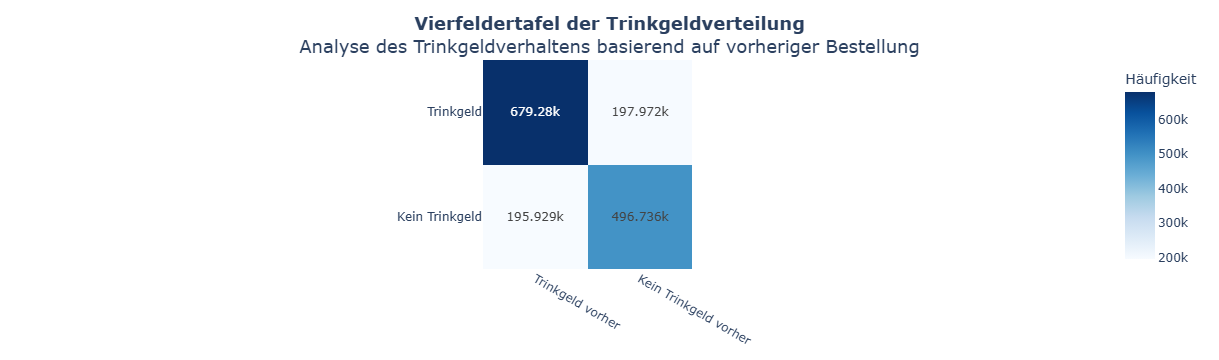

In [61]:
# Vierfeldertafel erstellen
vierfeldertafel_preorder = pd.crosstab(df_tips_orders.tip, df_tips_orders.pre_tip)
vierfeldertafel_preorder.index = ["Trinkgeld", "Kein Trinkgeld"]
vierfeldertafel_preorder.columns = ["Trinkgeld vorher", "Kein Trinkgeld vorher"]

# Heatmap-Darstellung
fig_vierfeldertafel_preorder = px.imshow(
    vierfeldertafel_preorder.values,  # Werte der Tafel
    x=vierfeldertafel_preorder.columns,  # Spaltennamen als x-Achse
    y=vierfeldertafel_preorder.index,    # Zeilennamen als y-Achse
    color_continuous_scale="Blues",  # Farbschema
    text_auto=True,  # Zahlen direkt in die Heatmap schreiben
    #template="plotly_dark",  # Dunkles Design
    width=900,  # Breite des Plots
)

fig_vierfeldertafel_preorder.update_layout(
    title="<b>Vierfeldertafel der Trinkgeldverteilung</b><br>Analyse des Trinkgeldverhaltens basierend auf vorheriger Bestellung<br>",  # Titel
    title_font=dict(size=18),  # Größerer Titel
    title_x=0.5,               # Titel horizontal zentrieren
    coloraxis_colorbar=dict(title="Häufigkeit")  # Farbskala beschriften
)

# Diagramm anzeigen
fig_vierfeldertafel_preorder.show()

##### Erste Interpretation
- Kunden, welche bei der Bestellung Trinkgeld gegeben haben, haben das bei der vorherigen Bestellung tendenziell auch gemacht.
- Kunden, welche bei der Bestellung kein Trinkgeld gegeben haben, haben das bei der vorherigen Bestellung auch nicht gemacht.

=> Kunden weisen bei dem Trinkgeldverhalten ein ähnliches Verhalten auf

##### Stochastische Überprüfung
- Variablen sind Diskret und Nominalskaliert, da beide Spalten Bools sind.
- Sehr große Stichprobengröße (n > 1.5M)
  
=> Chi-Quadrat zur Überprüfung der Abhängigkeit

* <u> Nullhypothese H0:</u> Es besteht kein Zusammenhang zwischen Trinkgeldverhalten der jetzigen zur vorherigen Bestellung.
* <u>Alternativhypothese H1:</u> Es besteht ein Zusammenhang zwischen Trinkgeldverhalten der jetzigen zur vorherigen Bestellung.
* Freiheitsgrad = (Anzahl Spalten - 1) * (Anzahl Zeilen - 1)
* Signifikanzniveau = 0.05
* Kritischen Wert aus Signifikanzniveau und Freiheitsgrad bestimmen.

In [62]:
freiheitsgrad = (vierfeldertafel_preorder.shape[0]- 1) * (vierfeldertafel_preorder.shape[1] - 1)
signifikanz = 0.05
critical_value = chi2.ppf(1 - signifikanz, freiheitsgrad)
print(f"Freiheitsgrad: {freiheitsgrad}")
print(f"Kritischer Wert: {round(critical_value,2)}")

Freiheitsgrad: 1
Kritischer Wert: 3.84


In [63]:
# Chi-Quadrat-Test
chisquare, p, _, _ = chi2_contingency(vierfeldertafel_preorder)

if chisquare > critical_value:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} > {round(critical_value,2)}")
    print("Es besteht ein signifikanter Zusammenhang zwischen den Variablen.")
else:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} < {round(critical_value,2)}")
    print("Es besteht kein signifikanter Zusammenhang zwischen den Variablen.")
print(f"p-Wert: {round(p, 4)}")

Chi-Quadrat-Test: 378959.08 > 3.84
Es besteht ein signifikanter Zusammenhang zwischen den Variablen.
p-Wert: 0.0


#### **Zusammenhang zur vor-vorhergehenden Bestellung**

Frage: Gibt es einen Zusammenhang bezüglich der vor-vorhergehenden Bestellung? 

In [64]:
# Vor-vorherige Order nach user_id hinzufügen
df_tips_orders["prepre_tip"] = df_tips_orders.groupby("user_id")["pre_tip"].shift(1)

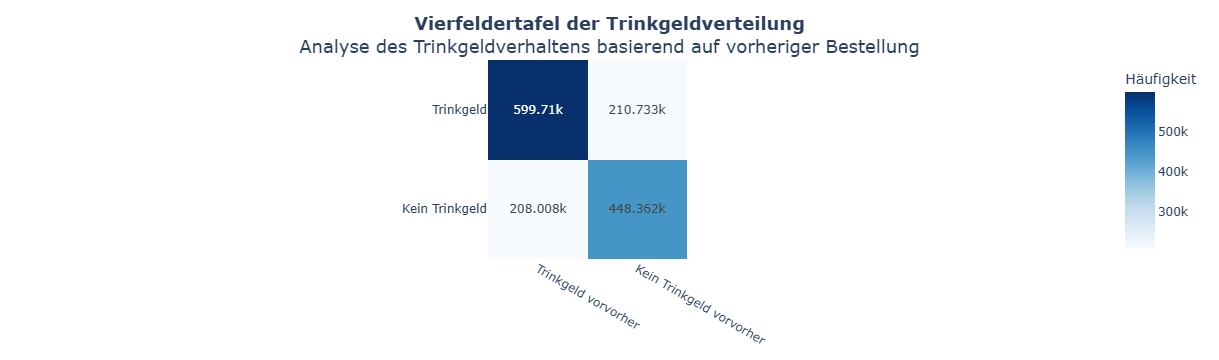

In [65]:
# Vierfeldertafel erstellen
vierfeldertafel_prepreorder = pd.crosstab(df_tips_orders.tip, df_tips_orders.prepre_tip)
vierfeldertafel_prepreorder.index = ["Trinkgeld", "Kein Trinkgeld"]
vierfeldertafel_prepreorder.columns = ["Trinkgeld vorvorher", "Kein Trinkgeld vorvorher"]

# Heatmap-Darstellung
fig_vierfeldertafel_prepreorder = px.imshow(
    vierfeldertafel_prepreorder.values,  # Werte der Tafel
    x=vierfeldertafel_prepreorder.columns,  # Spaltennamen als x-Achse
    y=vierfeldertafel_prepreorder.index,    # Zeilennamen als y-Achse
    color_continuous_scale="Blues",  # Farbschema
    text_auto=True,  # Zahlen direkt in die Heatmap schreiben
    #template="plotly_dark",  # Dunkles Design
    width=900,  # Breite des Plots
)

fig_vierfeldertafel_prepreorder.update_layout(
    title="<b>Vierfeldertafel der Trinkgeldverteilung</b><br>Analyse des Trinkgeldverhaltens basierend auf vorheriger Bestellung<br>",  # Titel
    title_font=dict(size=18),  # Größerer Titel
    title_x=0.5,               # Titel horizontal zentrieren
    coloraxis_colorbar=dict(title="Häufigkeit")  # Farbskala beschriften
)

# Diagramm anzeigen
fig_vierfeldertafel_prepreorder.show()

##### Erste Interpretation
- Kunden, welche bei der Bestellung Trinkgeld gegeben haben, haben das bei der vor-vorherigen Bestellung tendenziell auch gemacht.
- Kunden, welche bei der Bestellung kein Trinkgeld gegeben haben, haben das bei der vor-vorherigen Bestellung auch nicht gemacht.

=> Kunden scheinen auch über zwei Bestellungen ihr Trinkgeldverhalten tendenziell beizubehalten

##### Stochastische Überprüfung
- Variablen sind Diskret und Nominalskaliert, da beide Spalten Bools sind.
- Sehr große Stichprobengröße (n > 1.5M)
  
=> Chi-Quadrat zur Überprüfung der Abhängigkeit

* <u> Nullhypothese H0:</u> Es besteht kein Zusammenhang zwischen Trinkgeldverhalten der jetzigen zur vor-vorherigen Bestellung.
* <u>Alternativhypothese H1:</u> Es besteht ein Zusammenhang zwischen Trinkgeldverhalten der jetzigen zur vor-vorherigen Bestellung.
* Freiheitsgrad = (Anzahl Spalten - 1) * (Anzahl Zeilen - 1)
* Signifikanzniveau = 0.05
* Kritischen Wert aus Signifikanzniveau und Freiheitsgrad bestimmen.

In [66]:
# Freiheitsgrad berechnen
def berechnung_freiheitsgrad(table):
    return (table.shape[0] - 1) * (table.shape[1] - 1)

freiheitsgrad = berechnung_freiheitsgrad(vierfeldertafel_prepreorder)
signifikanz = 0.05
critical_value = chi2.ppf(1 - signifikanz, freiheitsgrad)
print(f"Freiheitsgrad: {freiheitsgrad}")
print(f"Kritischer Wert: {round(critical_value,2)}")

Freiheitsgrad: 1
Kritischer Wert: 3.84


In [67]:
# Chi-Quadrat-Test
chisquare, p, _, _ = chi2_contingency(vierfeldertafel_preorder)

if chisquare > critical_value:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} > {round(critical_value,2)}")
    print("Es besteht ein signifikanter Zusammenhang zwischen den Variablen.")
else:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} < {round(critical_value,2)}")
    print("Es besteht kein signifikanter Zusammenhang zwischen den Variablen.")
print(f"p-Wert: {round(p, 4)}")

Chi-Quadrat-Test: 378959.08 > 3.84
Es besteht ein signifikanter Zusammenhang zwischen den Variablen.
p-Wert: 0.0


#### **Direkter Zusammenhang zur vor-vorhergehenden Bestellung über vorhergehende Bestellung hinaus**

Frage: Liefert das Trinkgeldverhalten der vor-vorhergehende Bestellung Informationen auch über das 
hinaus, was bereits aus der vorhergehenden Bestellung abgelesen werden kann?

=> Zu prüfen: **P ( Trinkgeld | Vorheriges Trinkgeld, Vor-vorheriges Trinkgeld) ?= P ( Trinkgeld | Vorheriges Trinkgeld)** <br>
Bedingte Wahrscheinlichkeit mit und ohne dem Trinkgeldverhalten der vor-vorherigen Bestellung
<br> <br>
<u>Wenn gleich:</u> Keine neuen Informationen aus der vor-vorherigen Bestelllung (keine direkte Abhängigkeit) <br>
<u>Wenn ungleich:</u> Neue Information aus der vor-vorherigen Bestellung (direkte Abhängigkeit)

In [68]:
# Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten und vor-vorheriges Trinkgeldverhalten
# P(Tip | Tip-1, Tip-2) = P(Tip & Tip-1 & Tip-2) / P(Tip-1 & Tip-2)
p_t_given_t1_t2 = df_tips_orders[
    (df_tips_orders["tip"] == True) &
    (df_tips_orders["pre_tip"] == True) &
    (df_tips_orders["prepre_tip"] == True)
].shape[0] / df_tips_orders[
    (df_tips_orders["pre_tip"] == True) &
    (df_tips_orders["prepre_tip"] == True)
].shape[0]

# Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten
# P(Tip | Tip-1) = P(Tip & Tip-1) / P(Tip-1)
p_t_given_t1 = df_tips_orders[
    (df_tips_orders["tip"] == True) &
    (df_tips_orders["pre_tip"] == True)
].shape[0] / df_tips_orders[
    (df_tips_orders["pre_tip"] == True)
].shape[0]

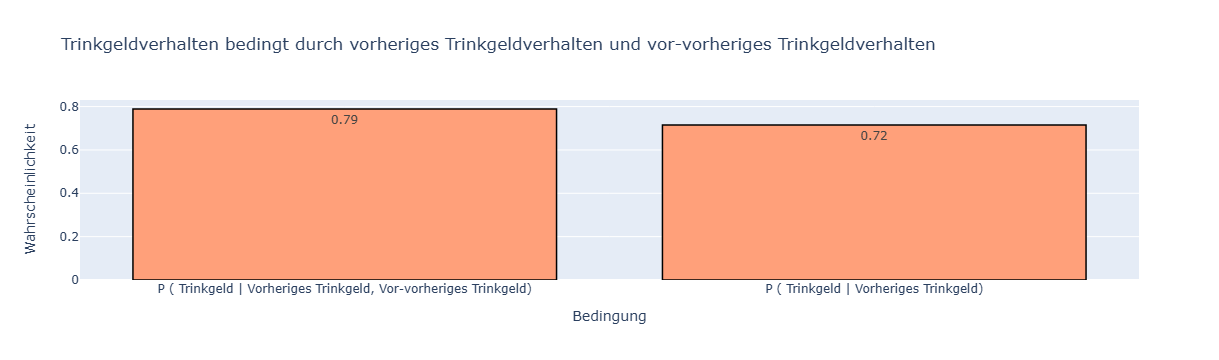

In [69]:
bedingt_fig = px.bar(
    x=["P ( Trinkgeld | Vorheriges Trinkgeld, Vor-vorheriges Trinkgeld)", "P ( Trinkgeld | Vorheriges Trinkgeld)"],
    y=[p_t_given_t1_t2, p_t_given_t1],
    text=[round(p_t_given_t1_t2, 2), round(p_t_given_t1, 2)],
    labels={"x": "Bedingung", "y": "Wahrscheinlichkeit"},
    title="Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten und vor-vorheriges Trinkgeldverhalten",
    # Farben für die Balken
    color_discrete_sequence=["#FFA07A", "#20B2AA"]
)

bedingt_fig.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black"
)

bedingt_fig.show()

In [70]:
print(f"Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten und vor-vorheriges Trinkgeldverhalten: {round(p_t_given_t1_t2, 2)}")
print(f"Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten: {round(p_t_given_t1, 2)}")

if p_t_given_t1_t2 == p_t_given_t1:
    print("=> Die vor-vorherige Bestellung liefert keine weiteren Informationen für das Trinkgeldverhalten über das voherige hinaus")
else:
    print("=> Die vor-vorherige Bestellung liefert weitere Informationen für das Trinkgeldverhalten über das voherige hinaus")

Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten und vor-vorheriges Trinkgeldverhalten: 0.79
Trinkgeldverhalten bedingt durch vorheriges Trinkgeldverhalten: 0.72
=> Die vor-vorherige Bestellung liefert weitere Informationen für das Trinkgeldverhalten über das voherige hinaus


##### Interpretation
Die Wahrscheinlichkeit, dass ein Kunde Trinkgeld gibt, nachdem er dies bereits in der vor- und vorvorherigen Bestellung getan hat, ist um 7% höher als wenn nur bekannt ist, dass der Kunde in der vorherigen Bestellung Trinkgeld gegeben hat.

### **Abhängigkeit des Trinkgeldverhaltens zu den Produkten und Departments**

#### **Zusammenhang zu Departments**

Frage: Gibt es einen Zusammenhang zwischen dem Trinkgeldverhalten und den Departments, aus denen bestellt wird?

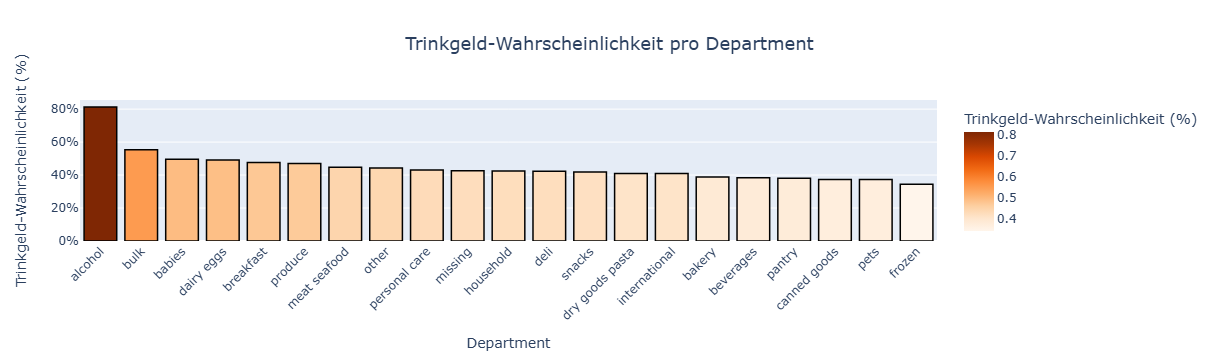

In [71]:
# Datenart: Nach Department gruppieren
df_department_tip = df_merged.groupby('department')['tip'].mean().reset_index()

# Visualisierung mit Plotly Express, als Balkendiagramm
fig_department_tip = px.bar(df_department_tip.sort_values('tip', ascending=False), 
             x='department', y='tip', 
             title="Trinkgeld-Wahrscheinlichkeit pro Department",
             labels={'tip': 'Trinkgeld-Wahrscheinlichkeit (%)', 'department': 'Department'},
             color='tip', color_continuous_scale='oranges'
)
# Achsentitel und Layout anpassen
fig_department_tip.update_layout(
    title_font=dict(size=18),  # Größerer Titel
    title_x=0.5,               # Titel horizontal zentrieren
    xaxis_tickangle=-45,
    yaxis_tickformat=".0%",  # Prozentformat mit einer Dezimalstelle
    yaxis=dict(dtick=0.2)    # Schritte in 20er-Intervallen# Schritte in 20er-Intervallen
)

# Linien und optische Anpassungen
fig_department_tip.update_traces(marker_line_width=1.5, marker_line_color="black")

# Tooltips erweitern
fig_department_tip.update_traces(hovertemplate="<b>Department:</b> %{x}<br>" +
                                "<b>Trinkgeld-Wahrscheinlichkeit:</b> %{y:.2%}")

# Diagramm anzeigen
fig_department_tip.show()

##### Erste Interpretation

Das Balkendiagramm zeigt, dass die Trinkgeld-Wahrscheinlichkeit je nach Kategorie stark variiert. Alkohol hat mit rund 80 % die höchste Wahrscheinlichkeit, während Haustierbedarf, Tiefkühlprodukte und Konserven mit unter 40 % die niedrigste haben. Kategorien wie Babynahrung oder Frühstück liegen im Mittelfeld. Höhere Trinkgelder treten eher bei emotionalen oder luxuriösen Käufen auf, während alltägliche Artikel seltener mit Trinkgeld verbunden sind. 

#### **Produkte mit starkem Einfluss auf das Trinkgeldverhalten**

Frage: Gibt es einzelne Produkte, die die Trinkgeldwahrscheinlichkeit besonders stark beeinflussen? (Ermitteln Sie die TOP10 und FLOP10) 

##### Vorbereitung

In [72]:
# Gruppieren nach Produkt-ID und Berechnung von Trinkgeld-Wahrscheinlichkeit und Bestellanzahl
df_product_tip = df_merged.groupby('product_id').agg(
    tip_probability=('tip', 'mean'),  # Durchschnittliche Trinkgeld-Wahrscheinlichkeit
    count=('product_id', 'size')     # Anzahl der Bestellungen
).reset_index()

# Merge mit den Produktinformationen
df_product_tip = df_product_tip.merge(
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

# Filtern: Nur Produkte mit mehr als 50 Bestellungen
df_product_tip = df_product_tip[df_product_tip['count'] > 500]

# 1. **Gewichtete Wahrscheinlichkeit berechnen**
df_product_tip['weighted_tip_probability'] = df_product_tip['tip_probability'] / df_product_tip['count']

# Sortierung nach `tip_probability` und `count`
df_top10_products = df_product_tip.sort_values(by=['tip_probability', 'count'], ascending=[False, False]).head(10)
df_flop10_products = df_product_tip.sort_values(by=['tip_probability', 'count'], ascending=[True, False]).head(10)

##### Visualisierung: Top 10 Produkte

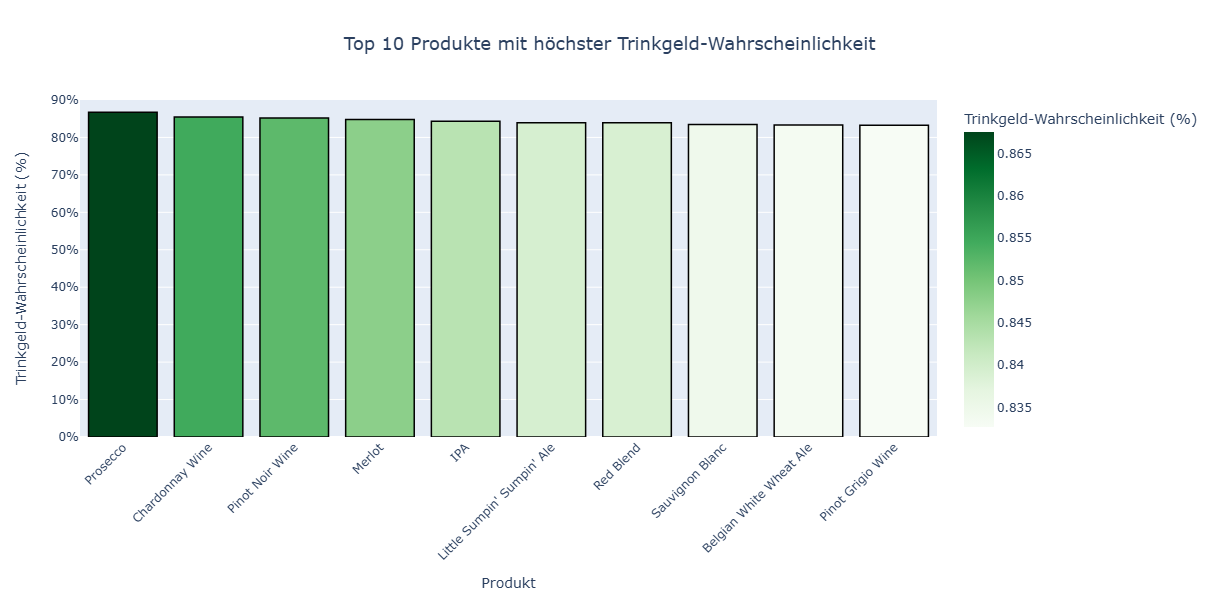

In [73]:
# Visualisierung: Top 10 Produkte
fig_top10 = px.bar(
    df_top10_products.sort_values('tip_probability', ascending=False),
    x='product_name', 
    y='tip_probability',
    title="Top 10 Produkte mit höchster Trinkgeld-Wahrscheinlichkeit",
    labels={
        'tip_probability': 'Trinkgeld-Wahrscheinlichkeit (%)', 
        'product_name': 'Produkt'
    },
    color='tip_probability', 
    color_continuous_scale='Greens',
    hover_data={'count': True},  # Tooltip zeigt die Anzahl der Käufe an
)

# Layout-Anpassungen
fig_top10.update_layout(
    title_font=dict(size=18),  # Größerer Titel
    title_x=0.5,               # Titel horizontal zentrieren
    xaxis=dict(title='Produkt', tickangle=-45),  # Rotierte Achsenticks
    yaxis=dict(title='Trinkgeld-Wahrscheinlichkeit (%)', tickformat=".0%", dtick=0.1, autorange=False, range=[0, 1]), # Prozentformat + Schritte in 10er-Intervallen
    width=1200,  
    height=600
)

# Skalierung der y-Achse, um relevante Werte zu fokussieren
fig_top10.update_layout(yaxis=dict(autorange=False, range=[0, 0.9]))

# Optische Verbesserungen und Tooltip-Template
fig_top10.update_traces(
    marker_line_width=1.5, 
    marker_line_color="black",
    hovertemplate="<b>Produkt:</b> %{x}<br>" +
                  "<b>Trinkgeld-Wahrscheinlichkeit:</b> %{y:.2%}<br>" +
                  "<b>Häufigkeit der Käufe:</b> %{customdata[0]}"
)

# Diagramm anzeigen
fig_top10.show()

##### Erste Interpretation

Das Diagramm zeigt, dass die höchste Trinkgeld-Wahrscheinlichkeit bei alkoholischen Produkten liegt, insbesondere bei Prosecco, Weinen, Bier und Spirituosen. Alle Produkte in den Top 10 haben eine Wahrscheinlichkeit von über 78 %, was auf den besonderen Charakter dieser Produkte (z. B. für Feierlichkeiten) hinweist. Prosecco steht mit über 80 % an der Spitze. Anbieter könnten diese Erkenntnis nutzen, um in diesen Kategorien gezielt Trinkgeldanreize zu fördern.

##### Visualisierung: Flop 10 Produkte

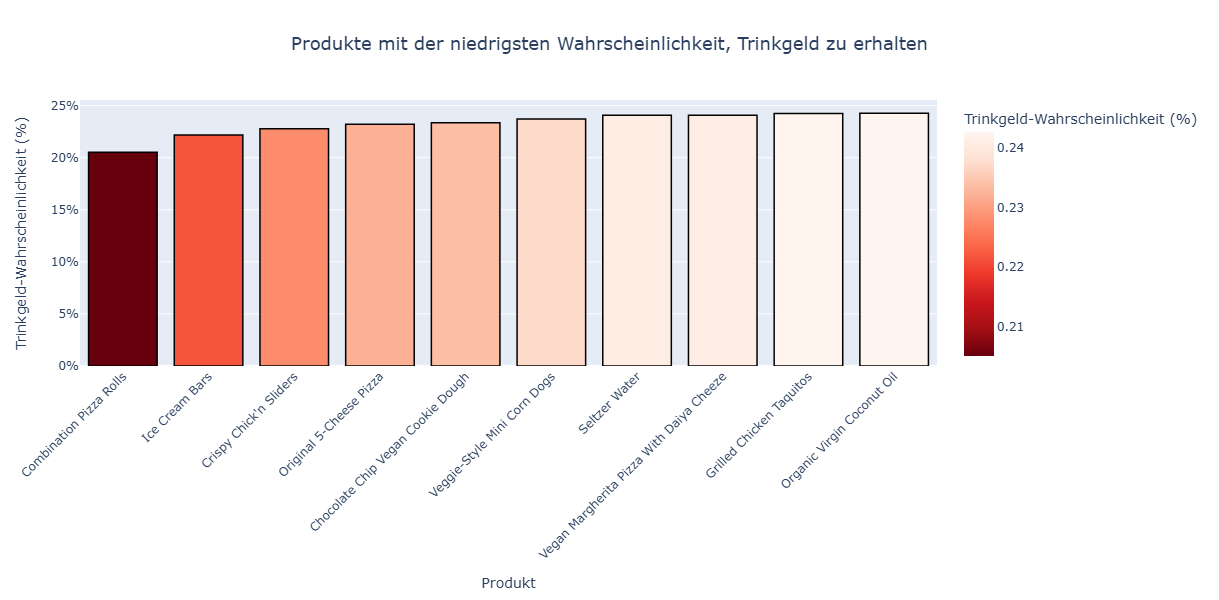

In [74]:
# Visualisierung: Flop 10 Produkte
fig_flop10 = px.bar(
    df_flop10_products.sort_values('tip_probability', ascending=True),
    x='product_name', 
    y='tip_probability',
    title="Produkte mit der niedrigsten Wahrscheinlichkeit, Trinkgeld zu erhalten",
    labels={
        'tip_probability': 'Trinkgeld-Wahrscheinlichkeit (%)', 
        'product_name': 'Produkt'
    },
    color='tip_probability', 
    color_continuous_scale='Reds_r',
    hover_data={'count': True},  # Tooltip zeigt die Anzahl der Käufe an
)

# Anpassungen an der Darstellung
fig_flop10.update_layout(
    title_font=dict(size=18),  # Größerer Titel
    title_x=0.5,               # Titel horizontal zentrieren
    xaxis=dict(title='Produkt', tickangle=-45),  # Rotierte Achsenticks
    yaxis=dict(title='Trinkgeld-Wahrscheinlichkeit (%)', tickformat=".0%"),  # Prozentformat
    width=1200,  # Breitere Grafik für bessere Lesbarkeit
    height=600
)

# Tooltip optimiert, um Bestellanzahl zu visualisieren
fig_flop10.update_traces(marker_line_width=1.5, marker_line_color="black")
fig_flop10.update_traces(hovertemplate="<b>Department:</b> %{x}<br>" +
                               "<b>Trinkgeld-Wahrscheinlichkeit:</b> %{y:.2%}<br>" +
                               "<b>Häufigkeit der Käufe:</b> %{customdata[0]}"
)

# Diagramm anzeigen
fig_flop10.show()

##### Erste Interpretation

Das Diagramm zeigt, dass Produkte des täglichen Bedarfs wie Tiefkühlartikel (z. B. Pizza Rolls, Chicken Sliders) und Snacks die niedrigste Trinkgeld-Wahrscheinlichkeit haben (ca. 20–24 %). Diese Artikel sind meist günstig und funktional, was Trinkgeld weniger wahrscheinlich macht. Besonders "Combination Pizza Rolls" stehen mit der geringsten Wahrscheinlichkeit (ca. 20 %) an der Spitze.

#### **Direkter Zusammenhang zu Produkten über entsprechende Departments hinaus**

Frage: Besteht der Zusammenhang aus (b) zusätzlich zu dem aus (a), d.h. beeinflusst das 
Vorhandensein der Produkte aus (b) die Trinkgeldwahrscheinlichkeit auch über das hinaus, 
was durch das Vorhandensein der entsprechenden Departments schon absehbar ist?  

=> zu prüfen: **P(Trinkgeld | Department, Produkt) ?= P(Trinkgeld | Department)**<br>
Bedingte Wahrscheinlichkeit mit und ohne Produkt

<u>Wenn gleich:</u> Kein Einfluss des Produktes über Department hinaus <br>
<u>Wenn ungleich:</u> Zusätzlicher Einfluss des Produktes über das Department hinaus



##### Möglichst aussagekräftige Stichprobe: Meistbestelltes Produkt aus meistbestelltem Department nehmen

In [75]:
# Menge an Bestellungen nach Department
df_department_order_count = df_merged.groupby('department').size().reset_index(name='order_count')
df_department_order_count = df_department_order_count.sort_values(by='order_count', ascending=False)
print(f"Deparment mit den meisten Bestellungen: {df_department_order_count.iloc[0]['department']}")

Deparment mit den meisten Bestellungen: produce


In [76]:
df_produce = df_merged[df_merged['department'] == 'produce']
# produkte in produce
df_produce_products = df_produce.groupby('product_name').size().reset_index(name='order_count')
df_produce_products = df_produce_products.sort_values(by='order_count', ascending=False)
print(f"Produkt mit den meisten Bestellungen im Department 'produce': {df_produce_products.iloc[0]['product_name']}")

Produkt mit den meisten Bestellungen im Department 'produce': Banana


**Formel: P (Trinkgeld = True | Department = Produce, Produkt = Banana) ?= P (Trinkgeld = True | Department = Produce)**

In [77]:
# P ( Trinkgeld | Department, Produkt) = (Trinkgeld & Department & Produkt) / (Department & Produkt)
count_trinkgeld_banana = df_merged[df_merged['product_name'] == 'Banana']
count_trinkgeld_banana = count_trinkgeld_banana[count_trinkgeld_banana['tip'] > 0].shape[0]

# Anzahl der Bestellungen von Bananen
count_banana = df_merged[df_merged['product_name'] == 'Banana'].shape[0]
trinkgeld_bedingt_banana_produce = round(count_trinkgeld_banana / count_banana,2)

print(f"Anzahl der Bestellungen von Bananen: {count_banana}")
print(f"Anzahl der Trinkgeld-Bestellungen von Bananen: {count_trinkgeld_banana}")
print(f"P(Trinkgeld | Department, Produkt) = {trinkgeld_bedingt_banana_produce}")

Anzahl der Bestellungen von Bananen: 244850
Anzahl der Trinkgeld-Bestellungen von Bananen: 139711
P(Trinkgeld | Department, Produkt) = 0.57


In [78]:
# P ( Trinkgeld | Department) = (Trinkgeld & Department) / Department
count_trinkgeld_produce= df_merged[df_merged['department'] == 'produce']
count_trinkgeld_produce = count_trinkgeld_produce[count_trinkgeld_produce['tip'] > 0].shape[0]

# Anzahl der Bestellungen im Department 'produce'
count_produce = df_merged[df_merged['department'] == 'produce'].shape[0]

trinkgeld_bedingt_produce = round(count_trinkgeld_produce / count_produce,2)

print(f"Anzahl der Bestellungen im Department 'produce': {count_produce}")
print(f"Anzahl der Trinkgeld-Bestellungen im Department 'produce': {count_trinkgeld_produce}")
print(f"P(Trinkgeld | Department) = {trinkgeld_bedingt_produce}")

Anzahl der Bestellungen im Department 'produce': 4957175
Anzahl der Trinkgeld-Bestellungen im Department 'produce': 2330380
P(Trinkgeld | Department) = 0.47


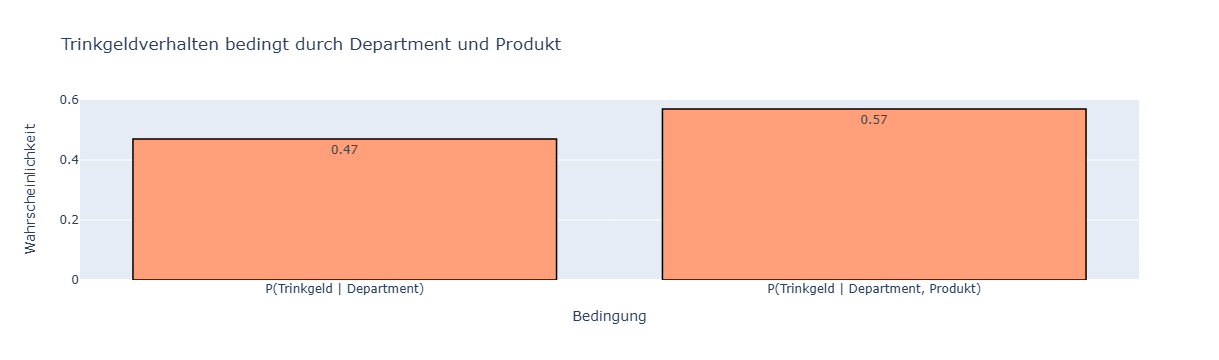

In [79]:
bedingt_fig = px.bar(
    x=["P(Trinkgeld | Department)", "P(Trinkgeld | Department, Produkt)"],
    y=[trinkgeld_bedingt_produce, trinkgeld_bedingt_banana_produce],
    text=[round(trinkgeld_bedingt_produce, 2), round(trinkgeld_bedingt_banana_produce, 2)],
    labels={"x": "Bedingung", "y": "Wahrscheinlichkeit"},
    title="Trinkgeldverhalten bedingt durch Department und Produkt",
    # Farben für die Balken
    color_discrete_sequence=["#FFA07A", "#20B2AA"]
)

bedingt_fig.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black"
)

bedingt_fig.show()

In [80]:
print(f"P(Trinkgeld | Department, Produkt) = {trinkgeld_bedingt_banana_produce}")
print(f"P(Trinkgeld | Department) = {trinkgeld_bedingt_produce}")

if trinkgeld_bedingt_banana_produce == trinkgeld_bedingt_produce:
    print('Unabhängig: Produkt beeinflusst die Wahrscheinlichkeit von Trinkgeld nicht über das Department hinaus')
else:
    print('Unabhängig: Produkt beeinflusst die Wahrscheinlichkeit von Trinkgeld nicht über das Department hinaus')


P(Trinkgeld | Department, Produkt) = 0.57
P(Trinkgeld | Department) = 0.47
Unabhängig: Produkt beeinflusst die Wahrscheinlichkeit von Trinkgeld nicht über das Department hinaus


##### Interpretation
Die bedingte Wahrscheinlichkeit des Trinkgelds, wenn Department und Produkt bekannt sind, ist um 10% höher als wenn nur Department bekannt ist. Dies bedeutet, dass Produkt einen Einfluss auch über das Department hat. 

### **Abhängigkeit des Trinkgeldverhaltens zur Tageszeit Wochentag und Zeitabstand zu vorheriger Bestellung**

#### **Zusammenhang zur Tageszeit**

Frage: Gibt es ein Zusammenhang zwischen dem Trinkgeldverhalten und der Tageszeit

In [81]:
# Mergen von Orders und Tips nach order_id
df_orders_tips = pd.merge(df_oders_s, df_tips, on="order_id", how="inner")
# unnamed columns entfernen
df_orders_tips = df_orders_tips.loc[:, ~df_orders_tips.columns.str.contains('^Unnamed')]
#df_orders_tips

In [82]:
hourly_counts = df_orders_tips.groupby(["order_hour_of_day", "tip"]).size().reset_index(name="count")
total_per_hour = hourly_counts.groupby("order_hour_of_day")["count"].transform("sum")
hourly_counts["relative"] = hourly_counts["count"] / total_per_hour
#hourly_counts.head(10)

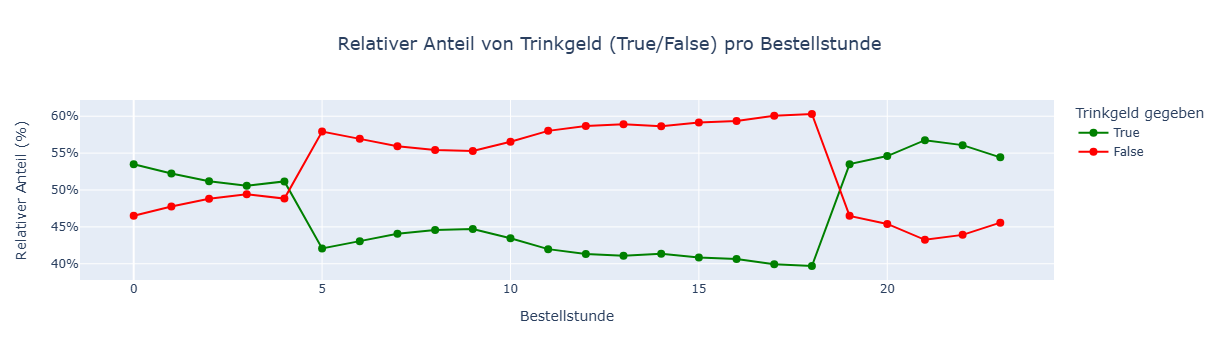

In [108]:
# Plotly Liniendiagramm
fig_order_hour_of_day_line = px.line(
    hourly_counts,
    x="order_hour_of_day",
    y="relative",
    color="tip",
    labels={
        "order_hour_of_day": "Bestellstunde", 
        "relative": "Relativer Anteil pro Stunde (%)", 
        "tip": "Trinkgeld gegeben"
    },
    title="Relativer Anteil von Trinkgeld (True/False) pro Bestellstunde",
    color_discrete_map={True: "green", False: "red"},
    category_orders={"tip": [True, False]}  # Reihenfolge der Farben
)

# Achsentitel und Layout anpassen
fig_order_hour_of_day_line.update_layout(
    title_font=dict(size=18),  # Schriftgröße des Titels erhöhen
    title_x=0.5,               # Titel horizontal zentrieren
    yaxis_tickformat=".0%",    # Y-Achse als Prozent formatieren
    xaxis_title="Bestellstunde",
    yaxis_title="Relativer Anteil (%)",
)

# Stil und Hover-Informationen anpassen
fig_order_hour_of_day_line.update_traces(
    mode="lines+markers",  # Linie und Punkte darstellen
    line=dict(width=2),    # Breite der Linie
    marker=dict(size=8),   # Größe der Punkte
    hovertemplate="<b>Trinkgeld gegeben:</b> %{legendgroup}<br>" +
                  "<b>Bestellstunde:</b> %{x}<br>" +
                  "<b>Relativer Anteil:</b> %{y:.2%}"  # Zeigt den relativen Anteil mit 2 Dezimalstellen
)

# Diagramm anzeigen
fig_order_hour_of_day_line.show()


In [84]:
# Aufteilung der Bestellzeit in Tagesabschnitte
def get_part_of_day(hour):
    if hour < 6:
        return "Nacht"
    elif hour < 12:
        return "Morgen"
    elif hour < 18:
        return "Mittag"
    else:
        return "Abend"

hourly_counts["order_part_of_day"] = hourly_counts["order_hour_of_day"].apply(get_part_of_day)
hourly_counts["relative_per_part_of_day"] = hourly_counts.groupby(["tip", "order_part_of_day"])["relative"].transform("median")

day_part_counts = hourly_counts.groupby(["order_part_of_day", "tip"])["relative_per_part_of_day"].mean().reset_index()
#hourly_counts.head(10)
#day_part_counts.head(10)

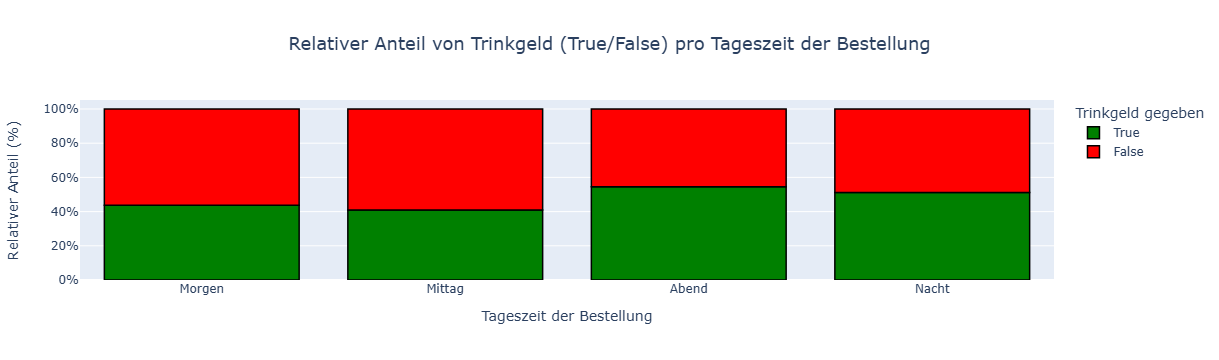

In [104]:
fig_order_part_of_day = px.bar(
    day_part_counts,
    x="order_part_of_day", 
    y="relative_per_part_of_day",
    color="tip",
    labels={"order_part_of_day": "Tageszeit der Bestellung", "relative_per_part_of_day": "Relativer Anteil (%)", "tip": "Trinkgeld gegeben"},
    title="Relativer Anteil von Trinkgeld (True/False) pro Tageszeit der Bestellung",
    color_discrete_map={True: "green", False: "red"},
    category_orders={"order_part_of_day": ["Morgen", "Mittag", "Abend", "Nacht"], "tip": [True, False]}  # Reihenfolge hier festlegen
)

# Achsentitel und Layout anpassen
fig_order_part_of_day.update_layout(
    title_font=dict(size=18),  # Schriftgröße des Titels erhöhen
    title_x=0.5,               # Titel horizontal zentrieren
    yaxis_tickformat=".0%",    # Format der Y-Achsen-Werte als Prozent ohne Nachkommastellen
)

# Stil der Balken und Hover-Informationen anpassen
fig_order_part_of_day.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black",
    hovertemplate="<b>Trinkgeld gegeben:</b> <br>" +
                  "<b>Tageszeit der Bestellung:</b> %{x} <br>" +
                  "<b>Relativer Anteil:</b> %{y:.2%}" # Zeigt den relativen Anteil mit 2 Dezimalstellen
)

# Diagramm anzeigen
fig_order_part_of_day.show()

##### Erste Interpretation

=> Es lässt sich eine leichte Tendenz ablesen, dass in der Mitte vom Tag tendenziell weniger Trinkgeld gegeben wird als am Tagesanfang oder -ende.

##### Stochastischer Beweis

- Tageszeit -> Intervallskaliert
- Annahme: Normalverteilung, da n > 30
- Nullhypothese H0: Es besteht kein Zusammenhang zwischen dem Trinkgeldverhalten und der Tageszeit.
- Alternativhypothese H1: Es besteht ein Zusammenhang zwischem dem Trinkgeldverhalten und der Tageszeit.
- Signifikanzniveau: 0.05

##### Ansatz: Gauß-Test

- Mittelwerte der Bestellzeiten ausrechnen:
  - Bestellung mit Trinkgeld
  - Bestellung ohne Trinkgeld
  <br>
=> Prüfen, ob signifikanter Unterschied existiert

In [86]:
# Durschnittliche Bestellzeit pro Tag nach Tip = True/False
mean_time_tip = df_orders_tips[df_orders_tips["tip"] == True]["order_hour_of_day"].mean()
mean_time_no_tip= df_orders_tips[df_orders_tips["tip"] == False]["order_hour_of_day"].mean()

print(f"Durchschnittliche Bestellzeit bei Trinkgeld: {round(mean_time_tip, 2)}")
print(f"Durchschnittliche Bestellzeit ohne Trinkgeld: {round(mean_time_no_tip, 2)}")

# Anzahl Bestellungen mit und ohne Trinkgeld => Prüfen, ob n > 30
n_tip = df_orders_tips[df_orders_tips["tip"] == True].shape[0]
n_no_tip = df_orders_tips[df_orders_tips["tip"] == False].shape[0]

print(f"Anzahl Bestellungen mit Trinkgeld: {n_tip}")
print(f"Anzahl Bestellungen ohne Trinkgeld: {n_no_tip}")

# Varianz der Bestellzeit pro Tag nach Tip = True/False
var_time_tip = df_orders_tips[df_orders_tips["tip"] == True]["order_hour_of_day"].var()
var_time_no_tip = df_orders_tips[df_orders_tips["tip"] == False]["order_hour_of_day"].var()

print(f"Varianz der Bestellzeit bei Trinkgeld: {round(var_time_tip, 2)}")
print(f"Varianz der Bestellzeit ohne Trinkgeld: {round(var_time_no_tip, 2)}")

z0 = (mean_time_tip - mean_time_no_tip) / np.sqrt((var_time_tip / n_tip) + (var_time_no_tip / n_no_tip))

print(f"Z-Wert: {round(z0, 2)}")

# kritischer Wert für z-Test abgelesen für alpha = 0.05
critical_value = 1.96

if z0 > critical_value:
    print(f"Z-Wert: {round(z0,2)} > {round(critical_value,2)}")
    print("Es besteht ein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.")
else:
    print(f"Z-Wert: {round(z0,2)} < {round(critical_value,2)}")
    print("Es besteht kein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.")

# Quelle: Buch - Wahrscheinlichkeitsrechnung und induktive Statistik (S. 317)

Durchschnittliche Bestellzeit bei Trinkgeld: 13.56
Durchschnittliche Bestellzeit ohne Trinkgeld: 13.34
Anzahl Bestellungen mit Trinkgeld: 730113
Anzahl Bestellungen ohne Trinkgeld: 942908
Varianz der Bestellzeit bei Trinkgeld: 19.83
Varianz der Bestellzeit ohne Trinkgeld: 16.37
Z-Wert: 32.42
Z-Wert: 32.42 > 1.96
Es besteht ein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.


#### **Zusammenhang zum Wochentag**

Frage: Gibt es einen Zusammenhang zwisdchen Trinkgeldverhalten und dem Wochentag

In [100]:
weekday_counts = df_orders_tips.groupby(["order_dow", "tip"]).size().reset_index(name="count")
total_per_weekday = weekday_counts.groupby("order_dow")["count"].transform("sum")
weekday_counts["relative"] = weekday_counts["count"] / total_per_weekday
# rename days
weekday_counts["order_dow"] = weekday_counts["order_dow"].replace({0: "Samstag", 1: "Sonntag", 2: "Montag", 3: "Dienstag", 4: "Mittwoch", 5: "Donnerstag", 6: "Freitag"})
#weekday_counts.head(20)

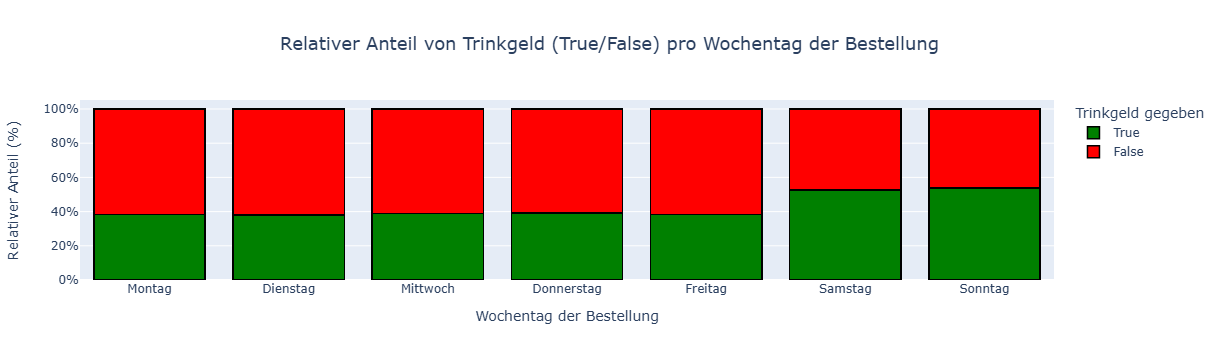

In [105]:
# Plotly gestapeltes Balkendiagramm
fig_order_dow = px.bar(
    weekday_counts,
    x="order_dow", 
    y="relative",
    color="tip",
    barmode="stack",
    labels={"order_dow": "Wochentag der Bestellung", "relative": "Relativer Anteil (%)", "tip": "Trinkgeld gegeben"},
    title="Relativer Anteil von Trinkgeld (True/False) pro Wochentag der Bestellung",
    color_discrete_map={True: "green", False: "red"},
    category_orders={"order_dow": ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"], "tip": [True, False]}  # Reihenfolge hier festlegen
    
)

# Achsentitel und Layout anpassen
fig_order_dow.update_layout(
    title_font=dict(size=18),  # Schriftgröße des Titels erhöhen
    title_x=0.5,               # Titel horizontal zentrieren
    yaxis_tickformat=".0%",    # Format der Y-Achsen-Werte als Prozent ohne Nachkommastellen
)

# Stil der Balken und Hover-Informationen anpassen
fig_order_dow.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black",
    hovertemplate="<b>Trinkgeld gegeben:</b>  <br>" +
                  "<b>Wochentag der Bestellung:</b> %{x} <br>" +
                  "<b>Relativer Anteil:</b> %{y:.2%}" # Zeigt den relativen Anteil mit 2 Dezimalstellen
)
    
# Diagramm anzeigen
fig_order_dow.show()

##### Erste Interpretation:

=> Es lässt sich eine Tendenz ablesen, dass bei den ersten beiden Tagen tendenziell mehr Trinkgeld gegeben wird.

In [89]:
weekday_ct = pd.crosstab(df_orders_tips["order_dow"], df_orders_tips["tip"])
freiheitsgrad = berechnung_freiheitsgrad(weekday_ct)
signifikanz = 0.05
critical_value = chi2.ppf(1 - signifikanz, freiheitsgrad)
print(f"Freiheitsgrad: {freiheitsgrad}")
print(f"Kritischer Wert: {round(critical_value,2)}")

Freiheitsgrad: 6
Kritischer Wert: 12.59


In [90]:
chisquare, p, _, _ = chi2_contingency(weekday_ct)
print(f"Chi-Quadrat-Test: {round(chisquare,2)}")
print(f"p-Wert: {round(p, 4)}")

if chisquare > critical_value:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} > {round(critical_value,2)}")
    print("Es besteht ein signifikanter Zusammenhang zwischen den Variablen.")
else:
    print(f"Chi-Quadrat-Test: {round(chisquare,2)} < {round(critical_value,2)}")
    print("Es besteht kein signifikanter Zusammenhang zwischen den Variablen.")

Chi-Quadrat-Test: 33249.76
p-Wert: 0.0
Chi-Quadrat-Test: 33249.76 > 12.59
Es besteht ein signifikanter Zusammenhang zwischen den Variablen.


#### **Zusammenhang zum Zeitabstand zur vorherigen Bestellung**

Frage: Gibt es ein Zusammenhang zwischen dem Trinkgeldverhalten und dem Zeitabstand der vorherigen Bestellung

In [91]:
# W
weekday_counts = df_orders_tips.groupby(["order_dow", "tip"]).size().reset_index(name="count")
total_per_weekday = weekday_counts.groupby("order_dow")["count"].transform("sum")
weekday_counts["relative"] = weekday_counts["count"] / total_per_weekday
# Labeling der Tage
weekday_counts["order_dow"] = weekday_counts["order_dow"].replace({0: "Sonntag", 1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag", 5: "Freitag", 6: "Samstag"})
#weekday_counts.head(20)

In [92]:
timediff_counts = df_orders_tips.groupby(["days_since_prior_order", "tip"]).size().reset_index(name="count")
total_per_timediff = timediff_counts.groupby("days_since_prior_order")["count"].transform("sum")
timediff_counts["relative"] = timediff_counts["count"] / total_per_timediff
timediff_counts.head(10)

,days_since_prior_order,tip,count,relative
0,0.0,False,18805,0.559556
1,0.0,True,14802,0.440444
2,1.0,False,41479,0.574167
3,1.0,True,30763,0.425833
4,2.0,False,52721,0.552278
5,2.0,True,42740,0.447722
6,3.0,False,56292,0.525465
7,3.0,True,50836,0.474535
8,4.0,False,55926,0.510539
9,4.0,True,53617,0.489461


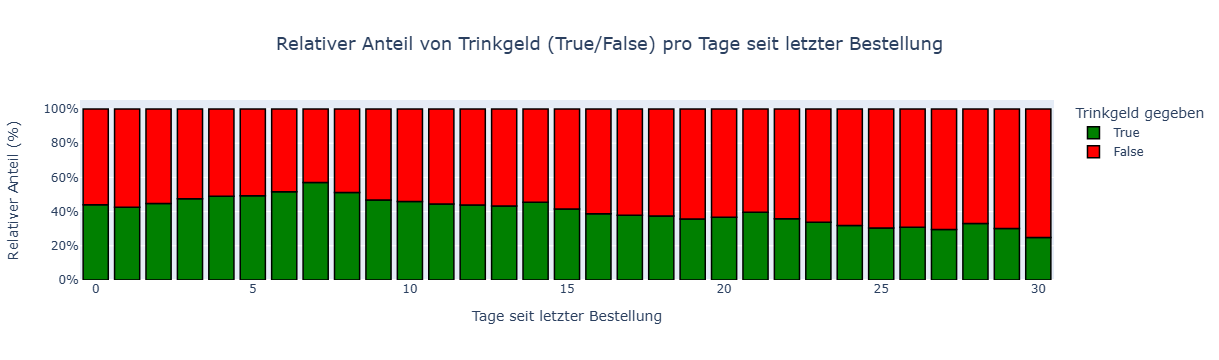

In [93]:
fig_days_since_prior_order = px.bar(
    timediff_counts,
    x="days_since_prior_order",
    y="relative",
    color="tip",
    labels={"days_since_prior_order": "Tage seit letzter Bestellung", "relative": "Relativer Anteil (%)", "tip": "Trinkgeld gegeben"},
    title="Relativer Anteil von Trinkgeld (True/False) pro Tage seit letzter Bestellung",
    color_discrete_map={True: "green", False: "red"},
    category_orders={"tip": [True, False]}
)

# Achsentitel und Layout anpassen
fig_days_since_prior_order.update_layout(
    title_font=dict(size=18),  # Schriftgröße des Titels erhöhen
    title_x=0.5,               # Titel horizontal zentrieren
    yaxis_tickformat=".0%",    # Format der Y-Achsen-Werte als Prozent ohne Nachkommastellen
)

# Stil der Balken und Hover-Informationen anpassen
fig_days_since_prior_order.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black",
    hovertemplate="<b>Trinkgeld gegeben:</b>  <br>" +
                  "<b>Tage seit letzter Bestellung:</b> %{x} <br>" +
                  "<b>Relativer Anteil:</b> %{y:.2%}" # Zeigt den relativen Anteil mit 2 Dezimalstellen
)
    
# Diagramm anzeigen
fig_days_since_prior_order.show()

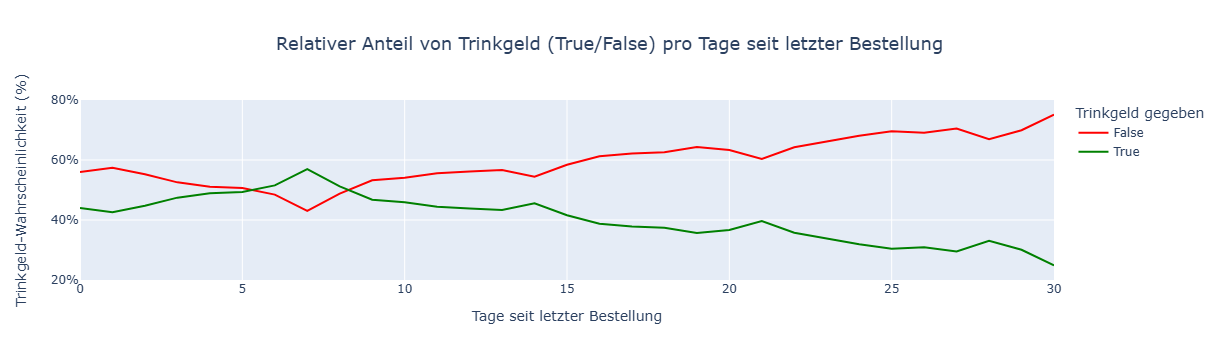

In [94]:
fig_days_since_prior_order_line = px.line(
    timediff_counts,
    x="days_since_prior_order",
    y="relative",
    color="tip",
    labels={"days_since_prior_order": "Tage seit letzter Bestellung", "relative": "Relativer Anteil (%)", "tip": "Trinkgeld gegeben"},
    title="Relativer Anteil von Trinkgeld (True/False) pro Tage seit letzter Bestellung",
    color_discrete_map={True: "green", False: "red"},
)

# Achsentitel und Layout anpassen
fig_days_since_prior_order_line.update_layout(
    title_font=dict(size=18),  # Schriftgröße des Titels erhöhen
    title_x=0.5,               # Titel horizontal zentrieren
    yaxis=dict(title='Trinkgeld-Wahrscheinlichkeit (%)', tickformat=".0%", dtick=0.2, autorange=False, range=[0.2, 0.8]), # Prozentformat + Schritte in 10er-Intervallen
)

# Stil der Balken und Hover-Informationen anpassen
fig_days_since_prior_order_line.update_traces(
    marker_line_width=1.5,                           
    marker_line_color="black",
    hovertemplate="<b>Trinkgeld gegeben:</b>  <br>" +
                  "<b>Tage seit letzter Bestellung:</b> %{x} <br>" +
                  "<b>Relativer Anteil:</b> %{y:.2%}" # Zeigt den relativen Anteil mit 2 Dezimalstellen
)

# Diagramm anzeigen
fig_days_since_prior_order_line 

##### Erste Interpretation:

=> Umso länger die letzte Bestellung her ist, umso unwahrscheinlicher scheint es, dass Trinkgeld gegeben wird.
<br>
=> Ca. im Abstand von einer Woche wird am meisten Trinkgeld gegeben.

In [95]:
# Durschnittliche Bestellzeit pro Tag nach Tip = True/False
mean_timediff_tip = df_orders_tips[df_orders_tips["tip"] == True]["days_since_prior_order"].mean()
mean_timediff_no_tip= df_orders_tips[df_orders_tips["tip"] == False]["days_since_prior_order"].mean()

print(f"Durchschnittlicher Bestellabstand bei Trinkgeld: {round(mean_timediff_tip, 2)}")
print(f"Durchschnittliche Bestellabstand ohne Trinkgeld: {round(mean_timediff_no_tip, 2)}")

Durchschnittlicher Bestellabstand bei Trinkgeld: 9.4
Durchschnittliche Bestellabstand ohne Trinkgeld: 12.2


In [96]:
# Anzahl Bestellungen mit und ohne Trinkgeld => Prüfen, ob n > 30
n_tip = df_orders_tips[df_orders_tips["tip"] == True].shape[0]
n_no_tip = df_orders_tips[df_orders_tips["tip"] == False].shape[0]

print(f"Anzahl Bestellungen mit Trinkgeld: {n_tip}")
print(f"Anzahl Bestellungen ohne Trinkgeld: {n_no_tip}")

Anzahl Bestellungen mit Trinkgeld: 730113
Anzahl Bestellungen ohne Trinkgeld: 942908


In [97]:
# Varianz der Bestellzeit pro Tag nach Tip = True/False
var_timediff_tip = df_orders_tips[df_orders_tips["tip"] == True]["days_since_prior_order"].var()
var_timediff_no_tip = df_orders_tips[df_orders_tips["tip"] == False]["days_since_prior_order"].var()

print(f"Varianz des Bestellabstandes bei Trinkgeld: {round(var_timediff_tip, 2)}")
print(f"Varianz des Bestellabstandes ohne Trinkgeld: {round(var_timediff_no_tip, 2)}")

Varianz des Bestellabstandes bei Trinkgeld: 61.06
Varianz des Bestellabstandes ohne Trinkgeld: 97.06


In [98]:
z0 = (mean_timediff_tip - mean_timediff_no_tip) / np.sqrt((var_timediff_tip / n_tip) + (var_timediff_no_tip / n_no_tip))
print(f"Z-Wert: {round(z0, 2)}")

# Betrag des Z-Werts
z0 = np.abs(z0)

# kritischer Wert für z-Test abgelesen für alpha = 0.05
critical_value = 1.96

if z0 > critical_value:
    print(f"Z-Wert: {round(z0,2)} > {round(critical_value,2)}")
    print("Es besteht ein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.")
else:
    print(f"Z-Wert: {round(z0,2)} < {round(critical_value,2)}")
    print("Es besteht kein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.")

Z-Wert: -204.77
Z-Wert: 204.77 > 1.96
Es besteht ein signifikanter Unterschied zwischen den Mittelwerten der Bestellzeiten.


## **Zusammenfassung**

Bei den konkreten Fragen hat sich gezeigt, dass die Trinkgeldwahrscheinlichkeit von sehr vielen Faktoren abhängt. 
Zum einen konnte man sehen, dass Kunden sehr oft das gleiche Verhalten aufzeigen, wie in den Bestellung zuvor und auf der anderen Seite hängt dies auch von den Produkten und Department haben. Ebenso spielen zeitliche Faktoren, wie der Wochentag, die Tageszeit als auch der Zeitabstand zur vorherigen Bestellung eine wichtige Rolle. 